In [62]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2


In [63]:
D=r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\images'

In [64]:
train=pd.read_csv(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train.csv') 

In [65]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [66]:
test=pd.read_csv(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\test.csv')

In [67]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


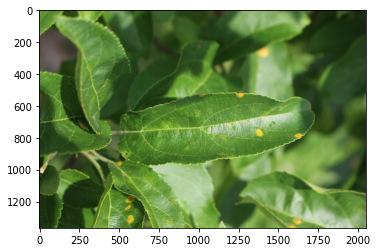

In [68]:
image1=Image.open(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\images\Test_0.jpg')
plt.imshow(image1)
plt.show()

In [69]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [70]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label']+train[i]*number ##new column + each row which has value==1  * its postion 
    number+=1
    

In [71]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


# Prepare the Training Data

In [72]:
img='Train_03.jpg'
img.split('.')
i=img.split('.')[0]
i

'Train_03'

In [73]:
sorted(os.listdir(D))# sort function can be used for alphanumeric labels for short dataset
# but for large dataset we have to use natsort-natsorted function
natsort.natsorted(os.listdir(D))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [74]:
D

'C:\\Users\\merug\\Desktop\\2021 project\\Apple-Classification\\plant-pathology-2020-fgvc7\\images'

In [75]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label
        

In [76]:
def create_train_data():
    images=natsort.natsorted(os.listdir(D))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(D,img)
        if search("Train",img):
             # to get only numeric value from labeled img
            if(img.split("_")[1].split(".")[0] and label.item()==0):
                shutil.copy(path,r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\healthy')#make new folder of healthy img from dataset
            elif(img.split("_")[1].split(".")[0] and label.item()==1):
                shutil.copy(path,r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\multiple_disease')
            elif(img.split("_")[1].split(".")[0] and label.item()==2):
                shutil.copy(path,r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\rust')
            elif(img.split("_")[1].split(".")[0] and label.item()==3):
                shutil.copy(path,r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\scab')
        elif( search("Test",img)):
            shutil.copy(path,r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\test')
            
                
                
                
                
           
            
        
        

In [77]:
#D

In [78]:
#img

In [79]:
#path=os.path.join(D,img)
#path

In [80]:
shutil.os.mkdir(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train')
shutil.os.mkdir(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\healthy')
shutil.os.mkdir(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\multiple_disease')
shutil.os.mkdir(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\rust')
shutil.os.mkdir(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train\scab')
shutil.os.mkdir(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\test')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\merug\\Desktop\\2021 project\\Apple-Classification\\plant-pathology-2020-fgvc7\\train'

In [81]:
train_dir=create_train_data()

100%|██████████| 3642/3642 [00:12<00:00, 284.53it/s]


In [82]:
# Data Preprocessing

In [83]:
# all images of different size we have amke it in to specific comparable size

In [84]:
train_D=r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train'
train_D

'C:\\Users\\merug\\Desktop\\2021 project\\Apple-Classification\\plant-pathology-2020-fgvc7\\train'

In [85]:
Categories=['healthy','multiple_disease','rust','scab']


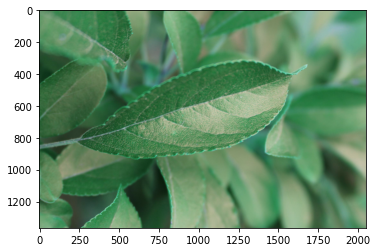

In [86]:
for j in Categories:
    path=os.path.join(train_D,j)#combing the path we categorized ,take all images at once 
    for img in os.listdir(path):
        old_img=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_img)
        plt.show()
        break
    break

In [87]:
# resize image to standard 224 pixels

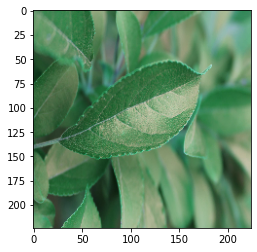

In [88]:
IMG_SIZE=224
new_img=cv2.resize(old_img,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_img)
plt.show()

# Model Preparation

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping


In [90]:
tf.test.is_gpu_available()

False

In [91]:
datagen=ImageDataGenerator(rescale=1./225,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 validation_split=0.2)
train_datagen=datagen.flow_from_directory(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train',target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='training'
                    )
val_datagen=datagen.flow_from_directory(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\train',target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='validation'
                    )

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [92]:
model=Sequential()# similar to VGG16 but custom build
# 3,3 is the pipeline of the model RGB it holds ,for Grey it's 1,1
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))  #with padding adds Zeros to the pixels of matrix and make it strong enough to hold no in each matrix
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),# lower the learning rate the more the effeciency
             loss='categorical_crossentropy',
             metrics=['accuracy'])# optimizer used reduce the loss and increase the effenciency compared to others adam is the best
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [93]:
checkpoint=ModelCheckpoint(r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\model\apple1.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1) #font size-verbose
earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                        verbose=1,
                        restore_best_weights=True)
#early stop used when acc not increasing,effeciency not decreasing for given 10 epoch
callbacks=[checkpoint,earlystop]


In [94]:
model_history=model.fit_generator(train_datagen,
                                 validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16,
                                callbacks=callbacks)

Epoch 1/30
90/91 [============================>.] - ETA: 1s - loss: 1.2692 - acc: 0.3380
Epoch 00001: val_loss improved from inf to 1.25946, saving model to C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\model\apple1.h5
91/91 [==============================] - 129s 1s/step - loss: 1.2682 - acc: 0.3384 - val_loss: 1.2595 - val_acc: 0.3466
Epoch 2/30
90/91 [============================>.] - ETA: 0s - loss: 1.2565 - acc: 0.3436
Epoch 00002: val_loss did not improve from 1.25946
91/91 [==============================] - 99s 1s/step - loss: 1.2582 - acc: 0.3426 - val_loss: 1.2750 - val_acc: 0.3466
Epoch 3/30
90/91 [============================>.] - ETA: 0s - loss: 1.2480 - acc: 0.3170
Epoch 00003: val_loss improved from 1.25946 to 1.24044, saving model to C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\model\apple1.h5
91/91 [==============================] - 90s 991ms/step - loss: 1.2474 - acc: 0.3169 - val_loss: 1.2404

Epoch 25/30
90/91 [============================>.] - ETA: 0s - loss: 0.5291 - acc: 0.8035
Epoch 00025: val_loss improved from 0.53163 to 0.50584, saving model to C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\model\apple1.h5
91/91 [==============================] - 92s 1s/step - loss: 0.5281 - acc: 0.8043 - val_loss: 0.5058 - val_acc: 0.8068
Epoch 26/30
90/91 [============================>.] - ETA: 0s - loss: 0.4880 - acc: 0.8222
Epoch 00026: val_loss improved from 0.50584 to 0.42696, saving model to C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\model\apple1.h5
91/91 [==============================] - 94s 1s/step - loss: 0.4862 - acc: 0.8228 - val_loss: 0.4270 - val_acc: 0.8438
Epoch 27/30
90/91 [============================>.] - ETA: 0s - loss: 0.3848 - acc: 0.8661
Epoch 00027: val_loss did not improve from 0.42696
91/91 [==============================] - 89s 983ms/step - loss: 0.3865 - acc: 0.8655 - val_loss: 

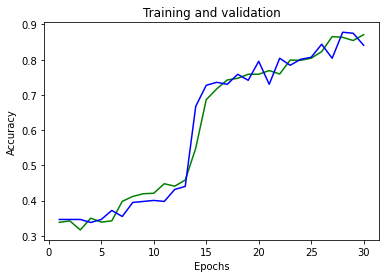

In [99]:
acc_train=model_history.history['acc']
acc_val=model_history.history['val_acc']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

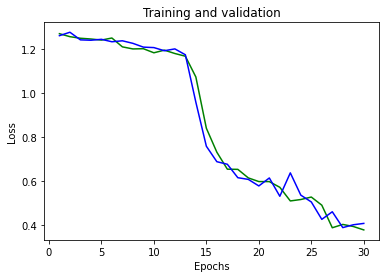

In [96]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [97]:
# Make prediction

[[0.9278085  0.00228941 0.00405704 0.06584506]]


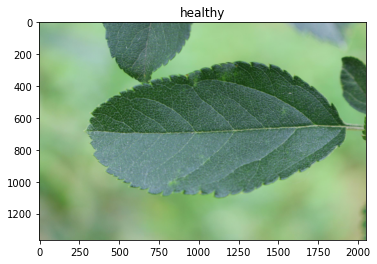

In [98]:
tes_img= r'C:\Users\merug\Desktop\2021 project\Apple-Classification\plant-pathology-2020-fgvc7\test\Test_3.jpg'
image_result=Image.open(tes_img)
from tensorflow.keras.preprocessing import image

test_img=image.load_img(tes_img,target_size=(224,224))

test_img=image.img_to_array(test_img)
test_img=test_img/225
test_img=np.expand_dims(test_img,axis=0)
result=model.predict(test_img)
print(result)# probability of accuracy
categories=['healthy','multiple_diseases','rust','scab']
#categories[np.argmax(result)]

image_result=plt.imshow(image_result)
plt.title(categories[np.argmax(result)])
plt.show()